**Table of contents**<a id='toc0_'></a>    
- [Importing Libraries](#toc1_)    
- [Configuring Visualization Parameters](#toc2_)    
- [Configuring Other Notebook Parameters](#toc3_)    
- [Pre-installing Custom Functions](#toc4_)    
- [Practicing in Stages](#toc5_)    
  - [DICOM in Python](#toc5_1_)    
    - [Extraction of DICOM File](#toc5_1_1_)    
    - [Visualization of DICOM File](#toc5_1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Importing Libraries](#toc0_)


In [1]:
# Import PyDicom before using PyDicom functions

# DICOM (Digital Imaging and Communications in Medicine) is the standard protocol for
# the management and transmission of medical images and related data, and is used by
# many healthcare facilities

# PyDicom is a pure Python package for working with DICOM files
import pydicom

In [2]:
# The `pathlib` module is similar to the `os.path` module, but `pathlib` provides a more
# advanced and convenient interface than `os.path`

# It is possible to use `pathlib` to represent file paths as specialized `Path` objects
# instead of plain strings
from pathlib import Path

In [3]:
import numpy as np

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
import random
import reprlib
import sys

# <a id='toc2_'></a>[Configuring Visualization Parameters](#toc0_)


In [6]:
%matplotlib inline

In [7]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [8]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": 0.8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI,
}

mpl.rcParams.update(custom_params)

# <a id='toc3_'></a>[Configuring Other Notebook Parameters](#toc0_)


In [9]:
reprlib_rules = reprlib.Repr()
reprlib_rules.maxother = 250

# <a id='toc4_'></a>[Pre-installing Custom Functions](#toc0_)


In [10]:
sys.path.append("../")

In [11]:
from Modules import *

# <a id='toc5_'></a>[Practicing in Stages](#toc0_)

## <a id='toc5_1_'></a>[DICOM in Python](#toc0_)

### <a id='toc5_1_1_'></a>[Extraction of DICOM File](#toc0_)

In [12]:
# The dataset used in this practice project is a very small subset of CT images extracted from
# the Cancer Imaging Archive (TCIA), which contains middle slices of all CT images where
# valid age, modality, and contrast tags can be found

# The dataset is provided by the Kaggel dataset called CT Medical Imaging
# (https://www.kaggle.com/datasets/kmader/siim-medical-images) under the license type
# (https://creativecommons.org/licenses/by/3.0)

# The link to the TCIA archive of the full dataset is
# https://wiki.cancerimagingarchive.net/display/Public/TCGA-LUAD
dir_path = "../Datasets/Kaggle - CT Medical Images/dicom_dir/"
sample_dcm = "ID_0000_AGE_0060_CONTRAST_1_CT.dcm"
# The main function of PyDicom to read and parse DICOM files is `read_file`
dicom_file = pydicom.read_file(dir_path + sample_dcm)

tabulation = Form_Generator()
tabulation.heading_printer("Initial understanding of DICOM file")

statements = [
    """
dir_path = "../Datasets/Kaggle - CT Medical Images/dicom_dir/"
sample_dcm = "ID_0000_AGE_0060_CONTRAST_1_CT.dcm"
dicom_file = pydicom.read_file(dir_path + sample_dcm)
"""
]
tabulation.statement_generator(statements)

variables = ["dicom_file"]
values = [str(reprlib_rules.repr(dicom_file))]
tabulation.variable_generator(variables, values)

expressions = [
    "dicom_file[0x0028, 0x0010]",
    "dicom_file[0x0028, 0x0011]",
    "dicom_file[0x0018, 0x0015]",
    "dicom_file.Rows",
    "dicom_file.Columns",
    "dicom_file.BodyPartExamined",
    "dicom_file.keys()",
    "dicom_file.values()",
    "dicom_file.dir()",
    'dicom_file.dir("Image")',
]
results = [
    str(dicom_file[0x0028, 0x0010]),
    str(dicom_file[0x0028, 0x0011]),
    str(dicom_file[0x0018, 0x0015]),
    str(dicom_file.Rows),
    str(dicom_file.Columns),
    str(dicom_file.BodyPartExamined),
    str(reprlib_rules.repr(dicom_file.keys())),
    str(reprlib_rules.repr(dicom_file.values())),
    str(reprlib_rules.repr(dicom_file.dir())),
    str(reprlib_rules.repr(dicom_file.dir("Image"))),
]
tabulation.expression_generator(expressions, results, 1)

Initial understanding of DICOM file

    +-------------------------------------------------------+
    | Statement                                             |
    +-------------------------------------------------------+
    | dir_path = "../Datasets/Kaggle - CT Medical           |
    |     Images/dicom_dir/"                                |
    | sample_dcm = "ID_0000_AGE_0060_CONTRAST_1_CT.dcm"     |
    | dicom_file = pydicom.read_file(dir_path + sample_dcm) |
    +-------------------------------------------------------+
    +------------+------------------------------------------------+
    | Variable   | Value                                          |
    +------------+------------------------------------------------+
    | dicom_file | Dataset.file_meta                              |
    |            |         -------------------------------        |
    |            | (0002, 0000) File Meta Information Group       |
    |            |         Length  UL: 194                 

In [13]:
# DICOM data has an attribute called `pixel_array` that provides more useful pixel data
# for uncompressed images that can be passed to the graphics library for viewing

# To use this attribute, the system must have the NumPy numeric package installed,
# since `pixel_array` returns a NumPy array
ct = dicom_file.pixel_array

tabulation = Form_Generator()
tabulation.heading_printer("Getting pixel data from DICOM file")

statements = ["ct = dicom_file.pixel_array"]
tabulation.statement_generator(statements)

variables = ["ct"]
values = [str(reprlib_rules.repr(ct))]
tabulation.variable_generator(variables, values)

expressions = ["ct.shape"]
results = [str(ct.shape)]
tabulation.expression_generator(expressions, results)

Getting pixel data from DICOM file

    +-----------------------------+
    | Statement                   |
    +-----------------------------+
    | ct = dicom_file.pixel_array |
    +-----------------------------+
    +----------+------------------------------------------------+
    | Variable | Value                                          |
    +----------+------------------------------------------------+
    | ct       | array([[0, 0, 0, ..., 0, 0, 0],                |
    |          |        [0, 0, 0, ..., 0, 0, 0],                |
    |          |        [0, 0, 0, ..., 0, 0, 0],                |
    |          |        ...,                                    |
    |          |        [0, 0, 0, ..., 0, 0, 0],                |
    |          |        [0, 0, 0, ..., 0, 0, 0],                |
    |          |        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16) |
    +----------+------------------------------------------------+
    +------------+------------+
    | Expression | Result 

### <a id='toc5_1_2_'></a>[Visualization of DICOM File](#toc0_)

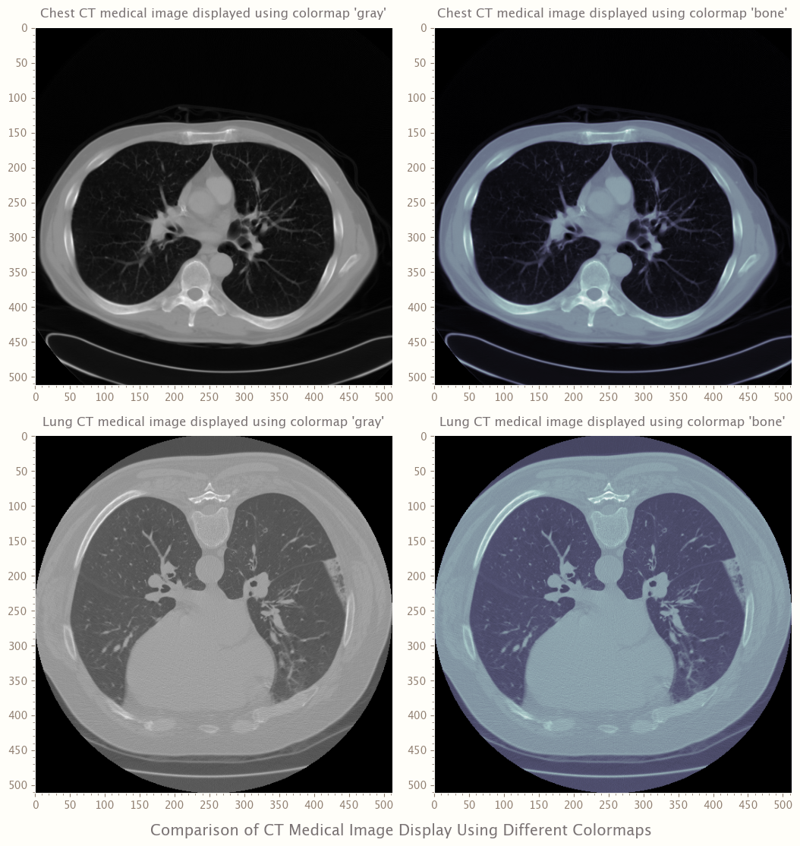

In [14]:
def image_display(image, ax, title, cmap):
    ax.imshow(image, cmap)
    ax.grid(False)
    ax.set_title(title, loc="center", pad=10)
    x_ticks = list(range(0, image.shape[1], 50))
    y_ticks = list(range(0, image.shape[0], 50))
    ax.set(xticks=x_ticks, xticklabels=x_ticks, yticks=y_ticks, yticklabels=y_ticks)
    ax.set_xlim(left=0)
    ax.set_ylim(top=0)
    ax.minorticks_on()
    return ax


# Path classes are divided between pure paths, which provide purely computational
# operations without I/O, and concrete paths, which inherit from pure paths but also
# provide I/O operations
path_object = Path(dir_path)
# `PurePath.name` returns a string representing the final path component, excluding
# the drive and root directory (if any)

# When a path points to a directory, `Path.iterdir` generates a path object of the directory's
# contents

# `Path.is_file` returns True if the path points to a normal file or to a symbolic link
# to a normal file, False if it points to another type of file
random_dicom_path = random.choice(
    [
        file.name
        for file in path_object.iterdir()
        if file.is_file() & (pydicom.read_file(file).BodyPartExamined != "CHEST")
    ]
)

random_dicom_file = pydicom.read_file(dir_path + random_dicom_path)

plt.rcParams["figure.figsize"] = (figure_size[0] / 3 * 2, figure_size[1] / 4 * 5)

fig, axs = plt.subplots(nrows=2, ncols=2)

image_display(
    ct,
    axs[0, 0],
    f"{dicom_file.BodyPartExamined.capitalize()} CT medical image displayed using "
    "colormap 'gray'",
    cmap="gray",
)

image_display(
    ct,
    axs[0, 1],
    f"{dicom_file.BodyPartExamined.capitalize()} CT medical image displayed using "
    "colormap 'bone'",
    cmap="bone",
)

image_display(
    random_dicom_file.pixel_array,
    axs[1, 0],
    f"{random_dicom_file.BodyPartExamined.capitalize()} CT medical image displayed using "
    "colormap 'gray'",
    cmap="gray",
)

image_display(
    random_dicom_file.pixel_array,
    axs[1, 1],
    f"{random_dicom_file.BodyPartExamined.capitalize()} CT medical image displayed using "
    "colormap 'bone'",
    cmap="bone",
)


fig.suptitle(
    "Comparison of CT Medical Image Display Using Different Colormaps",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.tight_layout()
plt.show()

In [15]:
def get_image_plane(dicom_file):
    # Image Position (Patient) (0020,0032) specifies the x, y, and z coordinates of 
    # the upper-left corner of the image; it is the center of the first voxel transmitted

    # Image Orientation (Patient) (0020,0037) specifies the orientation cosine of 
    # the first row and the first column with respect to the patient

    # These attributes shall be provided as a pair, with row values for the x, y, and z axes 
    # followed by column values for the x, y, and z axes

    # The orientation of the axes is determined fully by the orientation of the patient
    
    
    
    
    
    
    # DICOM uses a right-handed patient coordinate system with Left-Posterior-Head/Superior 
    # (LPH/LPS) axes

    # In DICOM, images are conceptually planar, defined by unit vectors pointing along rows 
    # and columns (IOP) and the position of the upper left pixel (IPP)




    # Although [][3]



    
    # Image Orientation (Patient) (0020,0037) values specify the orientation cosine 
    # of the first row and first column relative to the patient

    # These values should be provided as a pair of values, the row values for the x, y, 
    # and z axes, followed by the column values for the x, y, and z axes

    
    
    
    
    IOP = dicom_file.ImageOrientationPatient
    row_direction_xyz = IOP[:3]
    column_direction_xyz = IOP[3:]
    # `numpy.cross` returns the cross product of two vector arrays

    # The geometric interpretation of the cross product is that two vectors determine a plane, 
    # and the cross product points in a direction different from both vectors
    
    
    # abs
    # 3 plan
    
    plane = [abs(round(x)) for x in np.cross(row_direction_xyz, column_direction_xyz)]
    if plane[0] == 1 and plane[1] == 0 and plane[2] == 0:
        return "Sagittal"
    elif plane[0] == 0 and plane[1] == 1 and plane[2] == 0:
        return "Coronal"
    elif plane[0] == 0 and plane[1] == 0 and plane[2] == 1:
        return "Axial"
    else:
        "Unknown"
        
[0.707, 0.707, 0, 0.707, 0.707, 0]

[0.707, 0.707, 0, 0.707, 0.707, 0]

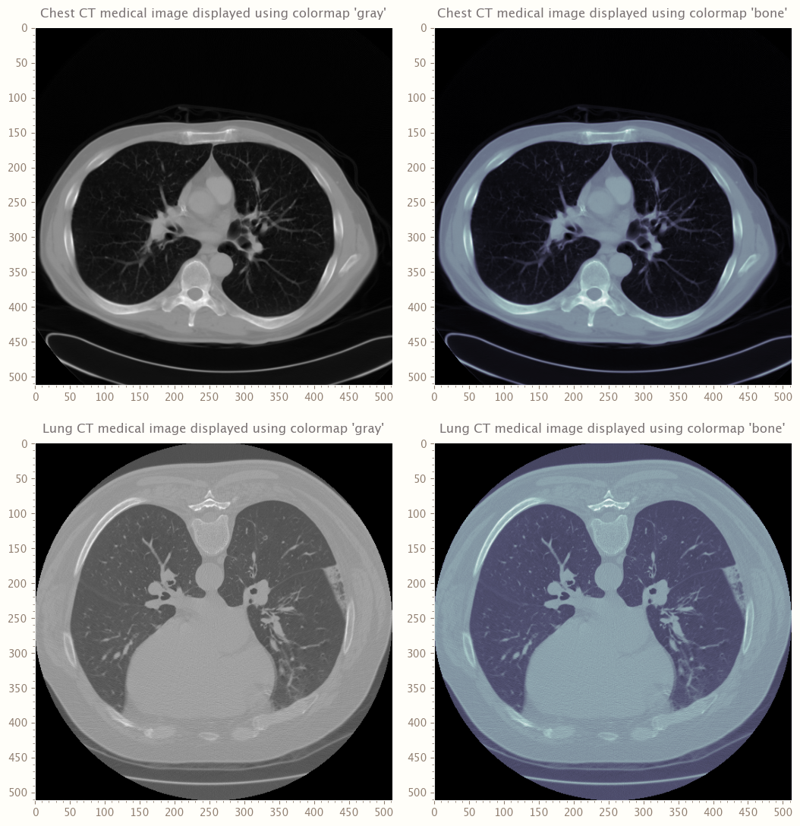

In [16]:
def anatomical_orientation_markers(dicom_file, ax, cmap):
    cmap_color = mpl.colormaps[cmap]
    rgba_color = cmap_color(0.9)
    return rgba_color


def DICOM_image_display(dicom_file, ax, title, cmap):
    ax.imshow(dicom_file.pixel_array, cmap)
    ax.grid(False)
    ax.set_title(title, loc="center", pad=10)
    x_ticks = list(range(0, dicom_file.Columns, 50))
    y_ticks = list(range(0, dicom_file.Rows, 50))
    ax.set(xticks=x_ticks, xticklabels=x_ticks, yticks=y_ticks, yticklabels=y_ticks)
    ax.set_xlim(left=0)
    ax.set_ylim(top=0)
    ax.minorticks_on()
    return ax


plt.rcParams["figure.figsize"] = (figure_size[0] / 3 * 2, figure_size[1] / 4 * 5)

# random_selector = np.random.choice(range(len(train_data)), 4)

fig, axs = plt.subplots(nrows=2, ncols=2)

DICOM_image_display(
    dicom_file,
    axs[0, 0],
    f"{dicom_file.BodyPartExamined.capitalize()} CT medical image displayed using "
    "colormap 'gray'",
    cmap="gray",
)

DICOM_image_display(
    dicom_file,
    axs[0, 1],
    f"{dicom_file.BodyPartExamined.capitalize()} CT medical image displayed using "
    "colormap 'bone'",
    cmap="bone",
)

DICOM_image_display(
    random_dicom_file,
    axs[1, 0],
    f"{random_dicom_file.BodyPartExamined.capitalize()} CT medical image displayed using "
    "colormap 'gray'",
    cmap="gray",
)

DICOM_image_display(
    random_dicom_file,
    axs[1, 1],
    f"{random_dicom_file.BodyPartExamined.capitalize()} CT medical image displayed using "
    "colormap 'bone'",
    cmap="bone",
)


fig.suptitle(
    "",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.tight_layout()
plt.show()

In [17]:
dicom_file.keys()
dicom_file.values()

dict_values([(0008, 0000) Group Length                        UL: 430, (0008, 0005) Specific Character Set              CS: 'ISO_IR 100', (0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL'], (0008, 0016) SOP Class UID                       UI: CT Image Storage, (0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169, (0008, 0020) Study Date                          DA: '19830708', (0008, 0021) Series Date                         DA: '19830708', (0008, 0022) Acquisition Date                    DA: '19830708', (0008, 0023) Content Date                        DA: '19830708', (0008, 0030) Study Time                          TM: '085723.000000', (0008, 0031) Series Time                         TM: '090344.332000', (0008, 0032) Acquisition Time                    TM: '090517.558000', (0008, 0033) Content Time                        TM: '090501.593000', (0008, 0040) Data Set Type                   

In [18]:
res = []

# construct path object
d = Path(dir_path)

# iterate directory
for entry in d.iterdir():
    # check if it a file
    if entry.is_file():
        print(type(entry))

<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.PosixPath'>
<class 'pathlib.Posi

In [19]:
path = Path(dir_path)

dicom_path = random.choice([entry for entry in path.iterdir() if (entry.is_file() and entry.name != sample_dcm)])

dicom_path.name

'ID_0055_AGE_0071_CONTRAST_0_CT.dcm'

In [20]:
for entry in d.iterdir():
    sample_dcm = entry.name
    dicom_file = pydicom.read_file(dir_path + sample_dcm)
    if dicom_file.RotationDirection == "CW":
        print(dicom_file.ImageOrientationPatient)
        print(get_image_plane(dicom_file))


[1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000]
Axial
[1, 0, 0, 0, 1, 0]
Axial
[1, 0, 0, 0, 1, 0]
Axial
[1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000]
Axial
[0.000000, -1.000000, 0.000000, 1.000000, 0.000000, 0.000000]
Axial
[1, 0, 0, 0, 1, 0]
Axial
[1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000]
Axial
[1, 0, 0, 0, 1, 0]
Axial
[1, 0, 0, 0, 1, 0]
Axial
[1, 0, 0, 0, 1, 0]
Axial
[1, 0, 0, 0, 1, 0]
Axial
[1, 0, 0, 0, 1, 0]
Axial
[1, 0, 0, 0, 1, 0]
Axial
[1, 0, 0, 0, 1, 0]
Axial
[1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000]
Axial
[1, 0, 0, 0, 1, 0]
Axial
[1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000]
Axial
[1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000]
Axial
[1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000]
Axial
[1, 0, 0, 0, 1, 0]
Axial
[1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000]
Axial
[1, 0, 0, 0, 1, 0]
Axial
[1, 0, 0, 0, 1, 0]
Axial
[1.000000, 0.000000, 0.000000, 0.000000, 1.000

In [21]:
cmap = mpl.colormaps["bone"]
rgba = cmap(0.9)
rgba

(0.8659619615501968, 0.9142156862745098, 0.9142156669730502, 1.0)

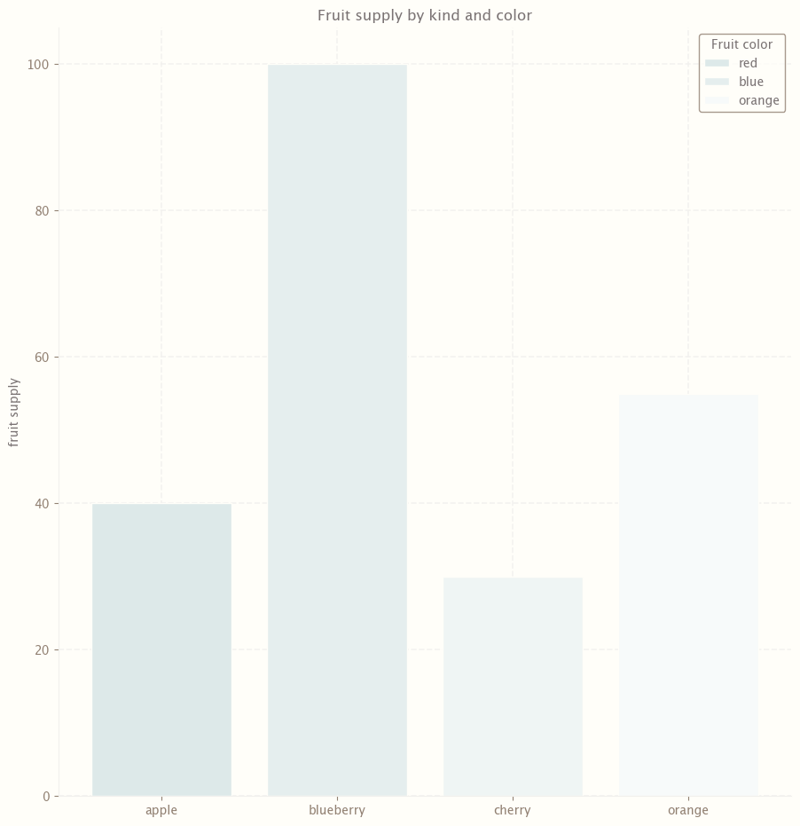

In [22]:
fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = [cmap(0.9), cmap(0.925), cmap(0.95), cmap(0.975)]

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

In [23]:
dicom_file.ImageOrientationPatient

[1, 0, 0, 0, 1, 0]

In [24]:
dicom_file.ImagePositionPatient

[-150, -307, -239]

In [25]:
dicom_file.SliceLocation

'-239.0'

In [26]:
round(0.5)

0

In [27]:
"abs(1).".split(".")

['abs(1)', '']

In [28]:
def file_plane(IOP):
    #IOP_round = [round(float(x)) for x in IOP]
    #plane = np.cross(IOP_round[0:3], IOP_round[3:6])
    #plane = [abs(x) for x in plane]
    IOP_round = IOP
    plane = [abs(round(x)) for x in np.cross(IOP_round[0:3], IOP_round[3:6])]
    return plane
    """
    if plane[0] == 1:
        return "Sagittal"
    elif plane[1] == 1:
        return "Coronal"
    elif plane[2] == 1:
        return "Transverse"
    """
    
#IOP=['1', '0', '0', '0', '0', '-1']
#IOP=['0', '1', '0', '0', '0', '-1']
IOP=[1, 0, 0, 0, -1, 0]
IOP=[0.707, 0.707, 0, 0.707, 0.707, 0]
#IOP=[0.5,0,-0.8660254,0,1,0] 

file_plane(IOP)

[0, 0, 0]

In [29]:
round(-0.707*0.707)

0

In [30]:
np.cross([-0.707, 0.707, 0], [0.707, 0.707, 0])

array([ 0.      ,  0.      , -0.999698])

In [31]:
np.cross([0.5,0,-0.8660254],[0,1,0])

array([ 0.8660254, -0.       ,  0.5      ])

In [32]:
dict_1 = dict(z = "d")
dict_1

{'z': 'd'}

In [33]:
import pandas as pd 

df = pd.DataFrame({'col1': [1, 1, 2, 2],
                   'col2': [0.5, 0.75, 0.5, 0.75]})
g = df.groupby("col1", group_keys=False).apply(lambda x:x)

g["col1"].unique()

array([1, 2])

In [34]:
df.shape[0]

4

In [35]:
df.to_dict('series')

{'col1': 0    1
 1    1
 2    2
 3    2
 Name: col1, dtype: int64,
 'col2': 0    0.50
 1    0.75
 2    0.50
 3    0.75
 Name: col2, dtype: float64}